# ABOUT THE PROJECT

***About the Project: Heart Disease Diagnosis***

The Heart Disease Diagnosis Project is designed to predict the likelihood of heart disease in patients using advanced machine learning algorithms. This project aims to provide a reliable and efficient tool for early heart disease detection, potentially assisting healthcare providers and patients in identifying risk factors and making proactive healthcare decisions.

Key aspects of this project include:

**Dataset**: A comprehensive heart disease dataset containing patient medical records and associated risk factors, such as age, cholesterol levels, blood pressure, and lifestyle habits.

**Technologies**: Machine Learning, Data Preprocessing, Feature Engineering, and Model Evaluation.

**Algorithms**: Testing various algorithms like Logistic Regression, Decision Trees, Random Forest, and Neural Networks to determine the most accurate and interpretable model.

**Evaluation Metrics**: Precision, Recall, F1-Score, and AUC-ROC to assess model performance and ensure reliable predictions.

This project aims to build a streamlined diagnostic tool, available through an intuitive user interface, to make heart disease risk assessment accessible and informative for non-specialists and professionals alike.




# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import os
import logging

# Loading Dataset

In [ ]:
df = pd.read_csv("Heart Disease data.csv")

# Exploratory Data Analysis

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [ ]:
df.shape

(1025, 14)

In [ ]:
df.describe(include="all")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

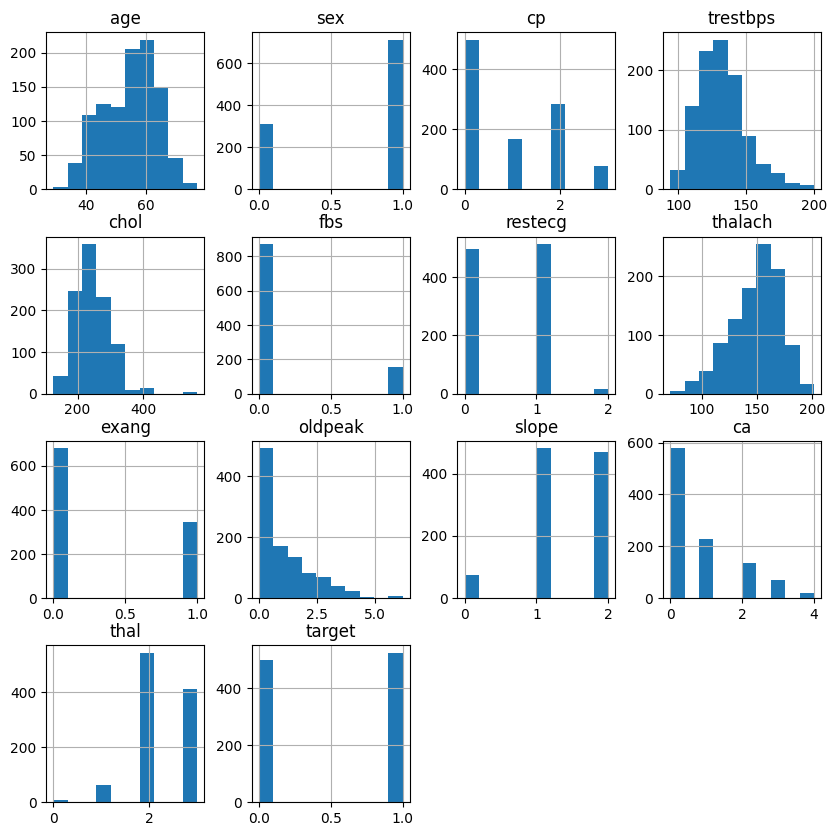

In [ ]:
df.hist(figsize=(10, 10))

# Manipulating Dataset



***AGE*** :

 age of the patient in years. Age is a key risk factor for heart disease, with older individuals being at higher risk.


***sex -***

The sex of the patient, typically encoded as 1 for male and 0 for female. Gender can influence the likelihood and type of heart disease.

***cp ( Chest Pain Type ):***

The cp represents the type of chest pain the patient is experiencing. It's usually categorized as:
0: Typical angina (chest pain caused by heart problems)
1: Atypical angina (less typical chest pain)
2: Non-anginal pain (chest pain not related to the heart)
3: Asymptomatic (no chest pain)

***trestbps (Resting Blood Pressure):***

The trestbps is the resting blood pressure of the patient in mm Hg. High blood pressure (hypertension) is a significant risk factor for heart disease.

***chol (Serum Cholesterol):***

The chol refers to the serum cholesterol level in mg/dl. High cholesterol levels are associated with an increased risk of heart disease.

***fbs (Fasting Blood Sugar):***

The fbs indicates whether the patient's fasting blood sugar is above 120 mg/dl. This is typically used to diagnose diabetes, which is a risk factor for heart disease. A value of:
1: Fasting blood sugar > 120 mg/dl (indicating higher risk)
0: Fasting blood sugar ≤ 120 mg/dl (normal levels)

***restecg (Resting Electrocardiographic Results):***

The restecg describes the results of the patient's resting electrocardiogram (ECG):
0: Normal (no signs of heart problems)
1: ST-T wave abnormality (could indicate possible heart disease)
2: Left ventricular hypertrophy (a thickening of the heart's left ventricle, often due to high blood pressure)


***thalach (Maximum Heart Rate Achieved):***

The thalach is the maximum heart rate the patient achieved during exercise testing. A high heart rate during physical activity is generally a sign of good cardiovascular fitness, while low heart rates could indicate heart disease.

***exang (Exercise Induced Angina):***

The exang indicates whether the patient experienced exercise-induced angina (chest pain or discomfort caused by exercise):
1: Yes, the patient experienced angina during exercise.
0: No, the patient did not experience angina during exercise.

***oldpeak (Depression Induced by Exercise):***

The oldpeak is the depression of the ST segment of the electrocardiogram (ECG) induced by exercise. It measures the extent of depression caused by exercise and is used to assess the severity of heart disease:
A higher value suggests more significant depression and potentially greater heart disease risk.

***slope (Slope of Peak Exercise ST Segment):***

The slope indicates the slope of the peak exercise ST segment in the ECG during exercise. It provides insight into how the heart is responding to stress:
0: Upsloping (considered normal)
1: Flat (could indicate mild or moderate heart disease)
2: Downsloping (suggestive of severe heart disease)

***ca (Number of Major Vessels Colored by Fluoroscopy):***

The ca refers to the number of major blood vessels (out of 4) that show significant narrowing or blockage when examined by fluoroscopy:
This number ranges from 0 to 4, with higher values indicating more severe blockages in coronary arteries, which could lead to heart disease.

***thal (Thalassemia):***

The thal indicates the presence of thalassemia, a blood disorder that can contribute to heart disease:
3: Normal
6: Fixed defect (a part of the heart muscle that doesn't recover)
7: Reversable defect (a region of the heart that recovers after treatment)

***target (Heart Disease Presence):***

The target is the outcome variable, representing whether or not the patient has heart disease:
1: The patient has heart disease.
0: The patient does not have heart disease.

In [ ]:
df = df.rename(columns={"cp":"Chest Pain", "trestbps":"Resting Blood Pressure","chol":"Serum Cholesterol","fbs":"Fasting Blood Sugar","restecg":"Resting ECG Results","thalach":"Max BPM",
                        "exang":"AP Agina","oldpeak":"Depression by Exercise","ca":"Major Blood Vessels","thal":"Thalassemia","target":"Heart Disease"})

# Creating New Features

## Age Grouping

```
`# This is formatted as code`
```



In [ ]:
def categorize_data(age):
  if age < 40:
    return "Young"
  elif 40 <= age < 60:
    return "Middle-aged"
  else:
    return "Senior"

df["Age Group"] = df["age"].apply(categorize_data)

cols = ['age', 'Age Group'] + [col for col in df.columns if col not in ['age', 'Age Group']]
df = df[cols]


In [ ]:
print(df[['age', 'Age Group']])

      age    Age Group
0      52  Middle-aged
1      53  Middle-aged
2      70       Senior
3      61       Senior
4      62       Senior
...   ...          ...
1020   59  Middle-aged
1021   60       Senior
1022   47  Middle-aged
1023   50  Middle-aged
1024   54  Middle-aged

[1025 rows x 2 columns]


In [ ]:
df.head()

,age,Age Group,sex,Chest Pain,Resting Blood Pressure,Serum Cholesterol,Fasting Blood Sugar,Resting ECG Results,Max BPM,AP Agina,Depression by Exercise,slope,Major Blood Vessels,Thalassemia,Heart Disease
0,52,Middle-aged,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,Middle-aged,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,Senior,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,Senior,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,Senior,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Cholestrol to Blood Pressure Ratio




In [ ]:
df['Chol-BP Ratio'] = df['Serum Cholesterol'] / df['Resting Blood Pressure']

df['Chol-BP Ratio'].fillna(df['Chol-BP Ratio'].median(), inplace=True)

# Display the updated DataFrame
print(df[['age', 'Serum Cholesterol', 'Resting Blood Pressure', 'Chol-BP Ratio']].head())


   age  Serum Cholesterol  Resting Blood Pressure  Chol-BP Ratio
0   52                212                     125       1.696000
1   53                203                     140       1.450000
2   70                174                     145       1.200000
3   61                203                     148       1.371622
4   62                294                     138       2.130435


<ipython-input-12-fe3a00748243>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Chol-BP Ratio'] = df['Serum Cholesterol'] / df['Resting Blood Pressure']
<ipython-input-12-fe3a00748243>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Chol-BP Ratio'].fillna(df['Chol-BP Ratio'].me

In [ ]:
df.head()

,age,Age Group,sex,Chest Pain,Resting Blood Pressure,Serum Cholesterol,Fasting Blood Sugar,Resting ECG Results,Max BPM,AP Agina,Depression by Exercise,slope,Major Blood Vessels,Thalassemia,Heart Disease,Chol-BP Ratio
0,52,Middle-aged,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1.696000
1,53,Middle-aged,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1.450000
2,70,Senior,1,0,145,174,0,1,125,1,2.6,0,0,3,0,1.200000
3,61,Senior,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1.371622
4,62,Senior,0,0,138,294,1,1,106,0,1.9,1,3,2,0,2.130435


## Heart Disease Risk Score

In [ ]:
# Normalize the relevant columns using Z-score normalization
df['age_norm'] = (df['age'] - df['age'].mean()) / df['age'].std()
df['chol_norm'] = (df['Serum Cholesterol'] - df['Serum Cholesterol'].mean()) / df['Serum Cholesterol'].std()
df['bp_norm'] = (df['Resting Blood Pressure'] - df['Resting Blood Pressure'].mean()) / df['Resting Blood Pressure'].std()
df['max_bpm_norm'] = (df['Max BPM'] - df['Max BPM'].mean()) / df['Max BPM'].std()

# Calculate the weighted risk score
df['Heart Disease Risk Score'] = (
    0.3 * df['age_norm'] +
    0.2 * df['chol_norm'] +
    0.2 * df['bp_norm'] +
    0.2 * df['max_bpm_norm'] +
    0.1 * df['Depression by Exercise']
)

# Display the updated DataFrame with the calculated risk score
print(df[['age', 'Serum Cholesterol', 'Resting Blood Pressure', 'Max BPM', 'Heart Disease Risk Score']].head())


   age  Serum Cholesterol  Resting Blood Pressure  Max BPM  \
0   52                212                     125      168   
1   53                203                     140      155   
2   70                174                     145      125   
3   61                203                     148      161   
4   62                294                     138      106   

   Heart Disease Risk Score  
0                 -0.023600  
1                  0.242828  
2                  0.438844  
3                  0.340873  
4                  0.324386  


In [ ]:
df.head()

,age,Age Group,sex,Chest Pain,Resting Blood Pressure,Serum Cholesterol,Fasting Blood Sugar,Resting ECG Results,Max BPM,AP Agina,...,slope,Major Blood Vessels,Thalassemia,Heart Disease,Chol-BP Ratio,age_norm,chol_norm,bp_norm,max_bpm_norm,Heart Disease Risk Score
0,52,Middle-aged,1,0,125,212,0,1,168,0,...,2,2,3,0,1.696000,-0.268306,-0.659010,-0.377451,0.820920,-0.023600
1,53,Middle-aged,1,0,140,203,1,0,155,1,...,0,0,3,0,1.450000,-0.158080,-0.833454,0.478874,0.255843,0.242828
2,70,Senior,1,0,145,174,0,1,125,1,...,0,0,3,0,1.200000,1.715758,-1.395551,0.764315,-1.048180,0.438844
3,61,Senior,1,0,148,203,0,1,161,0,...,2,1,3,0,1.371622,0.723726,-0.833454,0.935580,0.516648,0.340873
4,62,Senior,0,0,138,294,1,1,106,0,...,1,3,2,0,2.130435,0.833952,0.930368,0.364697,-1.874062,0.324386


In [ ]:
df = df.rename(columns={"Heart Disease Risk Score":"Risk Score"})

In [ ]:
df.head()

,age,Age Group,sex,Chest Pain,Resting Blood Pressure,Serum Cholesterol,Fasting Blood Sugar,Resting ECG Results,Max BPM,AP Agina,...,slope,Major Blood Vessels,Thalassemia,Heart Disease,Chol-BP Ratio,age_norm,chol_norm,bp_norm,max_bpm_norm,Risk Score
0,52,Middle-aged,1,0,125,212,0,1,168,0,...,2,2,3,0,1.696000,-0.268306,-0.659010,-0.377451,0.820920,-0.023600
1,53,Middle-aged,1,0,140,203,1,0,155,1,...,0,0,3,0,1.450000,-0.158080,-0.833454,0.478874,0.255843,0.242828
2,70,Senior,1,0,145,174,0,1,125,1,...,0,0,3,0,1.200000,1.715758,-1.395551,0.764315,-1.048180,0.438844
3,61,Senior,1,0,148,203,0,1,161,0,...,2,1,3,0,1.371622,0.723726,-0.833454,0.935580,0.516648,0.340873
4,62,Senior,0,0,138,294,1,1,106,0,...,1,3,2,0,2.130435,0.833952,0.930368,0.364697,-1.874062,0.324386


In [ ]:
# Define categories based on the heart disease risk score ranges
def categorize_risk(score):
    if score < 0.2:
        return "Low"
    elif 0.2 <= score < 0.4:
        return "Medium"
    else:
        return "High"

# Apply the function to create a new column 'RISK TYPE'
df['RISK TYPE'] = df['Risk Score'].apply(categorize_risk)

# Display the updated DataFrame to check results
print(df[['Risk Score', 'RISK TYPE']].head())


   Risk Score RISK TYPE
0   -0.023600       Low
1    0.242828    Medium
2    0.438844      High
3    0.340873    Medium
4    0.324386    Medium


In [ ]:
df.head()

,age,Age Group,sex,Chest Pain,Resting Blood Pressure,Serum Cholesterol,Fasting Blood Sugar,Resting ECG Results,Max BPM,AP Agina,...,Major Blood Vessels,Thalassemia,Heart Disease,Chol-BP Ratio,age_norm,chol_norm,bp_norm,max_bpm_norm,Risk Score,RISK TYPE
0,52,Middle-aged,1,0,125,212,0,1,168,0,...,2,3,0,1.696000,-0.268306,-0.659010,-0.377451,0.820920,-0.023600,Low
1,53,Middle-aged,1,0,140,203,1,0,155,1,...,0,3,0,1.450000,-0.158080,-0.833454,0.478874,0.255843,0.242828,Medium
2,70,Senior,1,0,145,174,0,1,125,1,...,0,3,0,1.200000,1.715758,-1.395551,0.764315,-1.048180,0.438844,High
3,61,Senior,1,0,148,203,0,1,161,0,...,1,3,0,1.371622,0.723726,-0.833454,0.935580,0.516648,0.340873,Medium
4,62,Senior,0,0,138,294,1,1,106,0,...,3,2,0,2.130435,0.833952,0.930368,0.364697,-1.874062,0.324386,Medium


## Exercise-Related Stress Level

In [ ]:
df['Exercise-Related Stress Level'] = (
    0.4 * df['Max BPM'] +
    0.3 * df['Depression by Exercise'] +
    0.3 * df['slope']
)

print(df[['Max BPM', 'Depression by Exercise', 'slope', 'Exercise-Related Stress Level']].head())


   Max BPM  Depression by Exercise  slope  Exercise-Related Stress Level
0      168                     1.0      2                          68.10
1      155                     3.1      0                          62.93
2      125                     2.6      0                          50.78
3      161                     0.0      2                          65.00
4      106                     1.9      1                          43.27


In [ ]:
df = df.rename(columns={"Exercise-Related Stress Level":"Stress Lvl"})

## Categorizing Blood - Pressure

Low, Normal, Prehypertension, Hypertension

In [ ]:
# Assuming 'Resting Blood Pressure' is already a numeric column in your DataFrame
def categorize_blood_pressure(bp):
    if bp < 90:
        return 'Low'
    elif 90 <= bp < 120:
        return 'Normal'
    elif 120 <= bp < 140:
        return 'Prehypertension'
    else:
        return 'Hypertension'

# Apply the function to create a new column
df['Blood Pressure Category'] = df['Resting Blood Pressure'].apply(categorize_blood_pressure)

# Display the updated DataFrame
print(df[['Resting Blood Pressure', 'Blood Pressure Category']].head())


   Resting Blood Pressure Blood Pressure Category
0                     125         Prehypertension
1                     140            Hypertension
2                     145            Hypertension
3                     148            Hypertension
4                     138         Prehypertension


In [ ]:
df = df.rename(columns={"Blood Pressure Category":"BP Category"})

In [ ]:
df.head()

,age,Age Group,sex,Chest Pain,Resting Blood Pressure,Serum Cholesterol,Fasting Blood Sugar,Resting ECG Results,Max BPM,AP Agina,...,Heart Disease,Chol-BP Ratio,age_norm,chol_norm,bp_norm,max_bpm_norm,Risk Score,RISK TYPE,Stress Lvl,BP Category
0,52,Middle-aged,1,0,125,212,0,1,168,0,...,0,1.696000,-0.268306,-0.659010,-0.377451,0.820920,-0.023600,Low,68.10,Prehypertension
1,53,Middle-aged,1,0,140,203,1,0,155,1,...,0,1.450000,-0.158080,-0.833454,0.478874,0.255843,0.242828,Medium,62.93,Hypertension
2,70,Senior,1,0,145,174,0,1,125,1,...,0,1.200000,1.715758,-1.395551,0.764315,-1.048180,0.438844,High,50.78,Hypertension
3,61,Senior,1,0,148,203,0,1,161,0,...,0,1.371622,0.723726,-0.833454,0.935580,0.516648,0.340873,Medium,65.00,Hypertension
4,62,Senior,0,0,138,294,1,1,106,0,...,0,2.130435,0.833952,0.930368,0.364697,-1.874062,0.324386,Medium,43.27,Prehypertension


## Thalassemia Severity Index

In [ ]:
def thalassemia_severity(thalassemia_value):
    if thalassemia_value == 1:
        return 'mild'  # Mild severity
    elif thalassemia_value == 2:
        return 'Moderate'  # Moderate severity
    elif thalassemia_value == 3:
        return 'Severe'  # Severe severity
    else:
        return 0  # If there is a 0 or unexpected value

df['T.Severity Index'] = df['Thalassemia'].apply(thalassemia_severity)

print(df[['Thalassemia', 'T.Severity Index']].head())


   Thalassemia T.Severity Index
0            3           Severe
1            3           Severe
2            3           Severe
3            3           Severe
4            2         Moderate


In [ ]:
df.head()

,age,Age Group,sex,Chest Pain,Resting Blood Pressure,Serum Cholesterol,Fasting Blood Sugar,Resting ECG Results,Max BPM,AP Agina,...,Chol-BP Ratio,age_norm,chol_norm,bp_norm,max_bpm_norm,Risk Score,RISK TYPE,Stress Lvl,BP Category,T.Severity Index
0,52,Middle-aged,1,0,125,212,0,1,168,0,...,1.696000,-0.268306,-0.659010,-0.377451,0.820920,-0.023600,Low,68.10,Prehypertension,Severe
1,53,Middle-aged,1,0,140,203,1,0,155,1,...,1.450000,-0.158080,-0.833454,0.478874,0.255843,0.242828,Medium,62.93,Hypertension,Severe
2,70,Senior,1,0,145,174,0,1,125,1,...,1.200000,1.715758,-1.395551,0.764315,-1.048180,0.438844,High,50.78,Hypertension,Severe
3,61,Senior,1,0,148,203,0,1,161,0,...,1.371622,0.723726,-0.833454,0.935580,0.516648,0.340873,Medium,65.00,Hypertension,Severe
4,62,Senior,0,0,138,294,1,1,106,0,...,2.130435,0.833952,0.930368,0.364697,-1.874062,0.324386,Medium,43.27,Prehypertension,Moderate


In [ ]:
df.head()

,age,Age Group,sex,Chest Pain,Resting Blood Pressure,Serum Cholesterol,Fasting Blood Sugar,Resting ECG Results,Max BPM,AP Agina,...,Chol-BP Ratio,age_norm,chol_norm,bp_norm,max_bpm_norm,Risk Score,RISK TYPE,Stress Lvl,BP Category,T.Severity Index
0,52,Middle-aged,1,0,125,212,0,1,168,0,...,1.696000,-0.268306,-0.659010,-0.377451,0.820920,-0.023600,Low,68.10,Prehypertension,Severe
1,53,Middle-aged,1,0,140,203,1,0,155,1,...,1.450000,-0.158080,-0.833454,0.478874,0.255843,0.242828,Medium,62.93,Hypertension,Severe
2,70,Senior,1,0,145,174,0,1,125,1,...,1.200000,1.715758,-1.395551,0.764315,-1.048180,0.438844,High,50.78,Hypertension,Severe
3,61,Senior,1,0,148,203,0,1,161,0,...,1.371622,0.723726,-0.833454,0.935580,0.516648,0.340873,Medium,65.00,Hypertension,Severe
4,62,Senior,0,0,138,294,1,1,106,0,...,2.130435,0.833952,0.930368,0.364697,-1.874062,0.324386,Medium,43.27,Prehypertension,Moderate


# Data Cleaning

In [ ]:
# removing unnecessary columns that are not important as features

In [ ]:
df = df.drop(columns='sex')

In [ ]:
# Finding duplicates and missing values

df.duplicated().sum()

723

In [ ]:
df.isnull().sum()

,0
age,0
Age Group,0
Chest Pain,0
Resting Blood Pressure,0
Serum Cholesterol,0
Fasting Blood Sugar,0
Resting ECG Results,0
Max BPM,0
AP Agina,0
Depression by Exercise,0


In [ ]:
# Dropping the duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

# Feature Engineering

In [ ]:
column_names = df.columns.tolist()

# Print the column names
print(column_names)

['age', 'Age Group', 'Chest Pain', 'Resting Blood Pressure', 'Serum Cholesterol', 'Fasting Blood Sugar', 'Resting ECG Results', 'Max BPM', 'AP Agina', 'Depression by Exercise', 'slope', 'Major Blood Vessels', 'Thalassemia', 'Heart Disease', 'Chol-BP Ratio', 'age_norm', 'chol_norm', 'bp_norm', 'max_bpm_norm', 'Risk Score', 'RISK TYPE', 'Stress Lvl', 'BP Category', 'T.Severity Index']


In [ ]:
# Drop unnecessary columns from the dataset
df.drop(['RISK TYPE', 'age_norm', 'chol_norm', 'bp_norm', 'max_bpm_norm'], axis=1, inplace=True)

# Check the remaining columns
print(df.columns)


Index(['age', 'Age Group', 'Chest Pain', 'Resting Blood Pressure',
       'Serum Cholesterol', 'Fasting Blood Sugar', 'Resting ECG Results',
       'Max BPM', 'AP Agina', 'Depression by Exercise', 'slope',
       'Major Blood Vessels', 'Thalassemia', 'Heart Disease', 'Chol-BP Ratio',
       'Risk Score', 'Stress Lvl', 'BP Category', 'T.Severity Index'],
      dtype='object')


In [ ]:
df.shape

(302, 19)

In [ ]:
df.head()

,age,Age Group,Chest Pain,Resting Blood Pressure,Serum Cholesterol,Fasting Blood Sugar,Resting ECG Results,Max BPM,AP Agina,Depression by Exercise,slope,Major Blood Vessels,Thalassemia,Heart Disease,Chol-BP Ratio,Risk Score,Stress Lvl,BP Category,T.Severity Index
0,52,Middle-aged,0,125,212,0,1,168,0,1.0,2,2,3,0,1.696000,-0.023600,68.10,Prehypertension,Severe
1,53,Middle-aged,0,140,203,1,0,155,1,3.1,0,0,3,0,1.450000,0.242828,62.93,Hypertension,Severe
2,70,Senior,0,145,174,0,1,125,1,2.6,0,0,3,0,1.200000,0.438844,50.78,Hypertension,Severe
3,61,Senior,0,148,203,0,1,161,0,0.0,2,1,3,0,1.371622,0.340873,65.00,Hypertension,Severe
4,62,Senior,0,138,294,1,1,106,0,1.9,1,3,2,0,2.130435,0.324386,43.27,Prehypertension,Moderate


In [ ]:
df.shape

(302, 19)

## Data Preprocessing

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [ ]:
label_Encoder = LabelEncoder()
OH_Encoder = OneHotEncoder()

df['Heart Disease'] = label_Encoder.fit_transform(df['Heart Disease'])
df['Fasting Blood Sugar'] = label_Encoder.fit_transform(df['Fasting Blood Sugar'])
df['Thalassemia'] = label_Encoder.fit_transform(df['Thalassemia'])

df = pd.get_dummies(df, columns=['Chest Pain', 'Age Group', 'Resting ECG Results', 'AP Agina', 'Major Blood Vessels', 'BP Category'], drop_first=True)

In [ ]:
df.shape


(302, 27)

In [ ]:
print(df.head())

   age  Resting Blood Pressure  Serum Cholesterol  Fasting Blood Sugar  \
0   52                     125                212                    0   
1   53                     140                203                    1   
2   70                     145                174                    0   
3   61                     148                203                    0   
4   62                     138                294                    1   

   Max BPM  Depression by Exercise  slope  Thalassemia  Heart Disease  \
0      168                     1.0      2            3              0   
1      155                     3.1      0            3              0   
2      125                     2.6      0            3              0   
3      161                     0.0      2            3              0   
4      106                     1.9      1            2              0   

   Chol-BP Ratio  ...  Age Group_Young  Resting ECG Results_1  \
0       1.696000  ...            False             

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns_to_scale = ['age', 'Resting Blood Pressure', 'Serum Cholesterol',
                    'Max BPM', 'Depression by Exercise', 'Chol-BP Ratio',
                    'Risk Score', 'Stress Lvl']

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print(df.head())

        age  Resting Blood Pressure  Serum Cholesterol  Fasting Blood Sugar  \
0 -0.267966               -0.376556          -0.667728                    0   
1 -0.157260                0.478910          -0.841918                    1   
2  1.724733                0.764066          -1.403197                    0   
3  0.728383                0.935159          -0.841918                    0   
4  0.839089                0.364848           0.919336                    1   

    Max BPM  Depression by Exercise  slope  Thalassemia  Heart Disease  \
0  0.806035               -0.037124      2            3              0   
1  0.237495                1.773958      0            3              0   
2 -1.074521                1.342748      0            3              0   
3  0.499898               -0.899544      2            3              0   
4 -1.905464                0.739054      1            2              0   

   Chol-BP Ratio  ...  Age Group_Young  Resting ECG Results_1  \
0      -0.45431

## Train Test Split

In [ ]:
# Why: To ensure model is trained on one portion of the data and tested on a separate portion to validate its performance.
# How: Use train_test_split from sklearn.model_selection.

from sklearn.model_selection import train_test_split

X = df.drop(columns=['Heart Disease'])  # All columns except target
y = df['Heart Disease']  # Target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) # splitting the test and train on 80-20 rule

print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")

Training Features Shape: (241, 26)
Testing Features Shape: (61, 26)
Training Target Shape: (241,)
Testing Target Shape: (61,)


# Model Selection

In [ ]:
df.head()

,age,Resting Blood Pressure,Serum Cholesterol,Fasting Blood Sugar,Max BPM,Depression by Exercise,slope,Thalassemia,Heart Disease,Chol-BP Ratio,...,Age Group_Young,Resting ECG Results_1,Resting ECG Results_2,AP Agina_1,Major Blood Vessels_1,Major Blood Vessels_2,Major Blood Vessels_3,Major Blood Vessels_4,BP Category_Normal,BP Category_Prehypertension
0,-0.267966,-0.376556,-0.667728,0,0.806035,-0.037124,2,3,0,-0.454317,...,False,True,False,False,False,True,False,False,False,True
1,-0.157260,0.478910,-0.841918,1,0.237495,1.773958,0,3,0,-1.005481,...,False,False,False,True,False,False,False,False,False,False
2,1.724733,0.764066,-1.403197,0,-1.074521,1.342748,0,3,0,-1.565608,...,False,True,False,True,False,False,False,False,False,False
3,0.728383,0.935159,-0.841918,0,0.499898,-0.899544,2,3,0,-1.181089,...,False,True,False,False,True,False,False,False,False,False
4,0.839089,0.364848,0.919336,1,-1.905464,0.739054,1,2,0,0.519036,...,False,True,False,False,False,False,True,False,False,True


In [ ]:
# LOGISTIC REGRESSION

print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, 163 to 119
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          241 non-null    float64
 1   Resting Blood Pressure       241 non-null    float64
 2   Serum Cholesterol            241 non-null    float64
 3   Fasting Blood Sugar          241 non-null    int64  
 4   Max BPM                      241 non-null    float64
 5   Depression by Exercise       241 non-null    float64
 6   slope                        241 non-null    int64  
 7   Thalassemia                  241 non-null    int64  
 8   Chol-BP Ratio                241 non-null    float64
 9   Risk Score                   241 non-null    float64
 10  Stress Lvl                   241 non-null    float64
 11  T.Severity Index             241 non-null    object 
 12  Chest Pain_1                 241 non-null    bool   
 13  Chest Pain_2           

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X_train['Thalassemia'] = label_encoder.fit_transform(X_train['Thalassemia'])
X_test['Thalassemia'] = label_encoder.transform(X_test['Thalassemia'])


In [ ]:
print(X_train.isnull().sum())


age                            0
Resting Blood Pressure         0
Serum Cholesterol              0
Fasting Blood Sugar            0
Max BPM                        0
Depression by Exercise         0
slope                          0
Thalassemia                    0
Chol-BP Ratio                  0
Risk Score                     0
Stress Lvl                     0
T.Severity Index               0
Chest Pain_1                   0
Chest Pain_2                   0
Chest Pain_3                   0
Age Group_Senior               0
Age Group_Young                0
Resting ECG Results_1          0
Resting ECG Results_2          0
AP Agina_1                     0
Major Blood Vessels_1          0
Major Blood Vessels_2          0
Major Blood Vessels_3          0
Major Blood Vessels_4          0
BP Category_Normal             0
BP Category_Prehypertension    0
dtype: int64


In [ ]:
print(X_train.dtypes)


age                            float64
Resting Blood Pressure         float64
Serum Cholesterol              float64
Fasting Blood Sugar              int64
Max BPM                        float64
Depression by Exercise         float64
slope                            int64
Thalassemia                      int64
Chol-BP Ratio                  float64
Risk Score                     float64
Stress Lvl                     float64
T.Severity Index                object
Chest Pain_1                      bool
Chest Pain_2                      bool
Chest Pain_3                      bool
Age Group_Senior                  bool
Age Group_Young                   bool
Resting ECG Results_1             bool
Resting ECG Results_2             bool
AP Agina_1                        bool
Major Blood Vessels_1             bool
Major Blood Vessels_2             bool
Major Blood Vessels_3             bool
Major Blood Vessels_4             bool
BP Category_Normal                bool
BP Category_Prehypertensi

In [ ]:
print(X_train['T.Severity Index'].unique())


['Severe' 'Moderate' 'mild' 0]


In [ ]:
X_train['T.Severity Index'] = X_train['T.Severity Index'].astype(str)
X_test['T.Severity Index'] = X_test['T.Severity Index'].astype(str)


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

X_train['T.Severity Index'] = label_encoder.fit_transform(X_train['T.Severity Index'])
X_test['T.Severity Index'] = label_encoder.transform(X_test['T.Severity Index'])


In [ ]:
print(X_train.dtypes)


age                            float64
Resting Blood Pressure         float64
Serum Cholesterol              float64
Fasting Blood Sugar              int64
Max BPM                        float64
Depression by Exercise         float64
slope                            int64
Thalassemia                      int64
Chol-BP Ratio                  float64
Risk Score                     float64
Stress Lvl                     float64
T.Severity Index                 int64
Chest Pain_1                      bool
Chest Pain_2                      bool
Chest Pain_3                      bool
Age Group_Senior                  bool
Age Group_Young                   bool
Resting ECG Results_1             bool
Resting ECG Results_2             bool
AP Agina_1                        bool
Major Blood Vessels_1             bool
Major Blood Vessels_2             bool
Major Blood Vessels_3             bool
Major Blood Vessels_4             bool
BP Category_Normal                bool
BP Category_Prehypertensi

## Logistic Regression

In [ ]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)
y_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC-AUC

# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
roc_auc_logistic = roc_auc_score(y_test, y_prob_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

# Print evaluation metrics
print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_logistic:.4f}")
print(f"Precision: {precision_logistic:.4f}")
print(f"Recall: {recall_logistic:.4f}")
print(f"F1-Score: {f1_logistic:.4f}")
print(f"ROC-AUC: {roc_auc_logistic:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_logistic}")


Logistic Regression Evaluation:
Accuracy: 0.7705
Precision: 0.7143
Recall: 0.8621
F1-Score: 0.7812
ROC-AUC: 0.8297
Confusion Matrix:
[[22 10]
 [ 4 25]]


### Checking Overfitting/Underfitting

In [ ]:
# Evaluate on training data
y_pred_train_logistic = logistic_model.predict(X_train)
accuracy_train_logistic = accuracy_score(y_train, y_pred_train_logistic)
print(f"Training Accuracy: {accuracy_train_logistic:.4f}")

# Evaluate on testing data
y_pred_test_logistic = logistic_model.predict(X_test)
accuracy_test_logistic = accuracy_score(y_test, y_pred_test_logistic)
print(f"Testing Accuracy: {accuracy_test_logistic:.4f}")

Training Accuracy: 0.8672
Testing Accuracy: 0.7705


### Resolving Overfitting of Data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Initialize Logistic Regression with L2 regularization
logistic_model_regularized = LogisticRegression(max_iter=1000, random_state=42, penalty='l2', C=0.5)  # C can be adjusted

# Train the model
logistic_model_regularized.fit(X_train, y_train)

# Make predictions
y_pred_logistic_regularized = logistic_model_regularized.predict(X_test)
y_prob_logistic_regularized = logistic_model_regularized.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_logistic_regularized = accuracy_score(y_test, y_pred_logistic_regularized)
precision_logistic_regularized = precision_score(y_test, y_pred_logistic_regularized)
recall_logistic_regularized = recall_score(y_test, y_pred_logistic_regularized)
f1_logistic_regularized = f1_score(y_test, y_pred_logistic_regularized)
roc_auc_logistic_regularized = roc_auc_score(y_test, y_prob_logistic_regularized)
conf_matrix_logistic_regularized = confusion_matrix(y_test, y_pred_logistic_regularized)

# Print evaluation metrics
print("Logistic Regression with L2 Regularization Evaluation:")
print(f"Accuracy: {accuracy_logistic_regularized:.4f}")
print(f"Precision: {precision_logistic_regularized:.4f}")
print(f"Recall: {recall_logistic_regularized:.4f}")
print(f"F1-Score: {f1_logistic_regularized:.4f}")
print(f"ROC-AUC: {roc_auc_logistic_regularized:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_logistic_regularized}")


Logistic Regression with L2 Regularization Evaluation:
Accuracy: 0.7541
Precision: 0.7059
Recall: 0.8276
F1-Score: 0.7619
ROC-AUC: 0.8297
Confusion Matrix:
[[22 10]
 [ 5 24]]


## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [ ]:
# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = decision_tree_model.predict(X_test)
y_prob_dt = decision_tree_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC-AUC


In [ ]:
# Calculate the evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Print the evaluation metrics
print("Decision Tree Evaluation:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")
print(f"ROC-AUC: {roc_auc_dt:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_dt}")


Decision Tree Evaluation:
Accuracy: 0.7213
Precision: 0.7000
Recall: 0.7241
F1-Score: 0.7119
ROC-AUC: 0.7214
Confusion Matrix:
[[23  9]
 [ 8 21]]


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [ ]:
# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest_model.predict(X_test)
y_prob_rf = random_forest_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC-AUC


In [ ]:
# Calculate the evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print the evaluation metrics
print("Random Forest Evaluation:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"ROC-AUC: {roc_auc_rf:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_rf}")


Random Forest Evaluation:
Accuracy: 0.7213
Precision: 0.6765
Recall: 0.7931
F1-Score: 0.7302
ROC-AUC: 0.8416
Confusion Matrix:
[[21 11]
 [ 6 23]]


## ADABoost Model

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [ ]:
# Initialize the AdaBoost model
adaboost_model = AdaBoostClassifier(random_state=42)

# Train the model
adaboost_model.fit(X_train, y_train)

# Make predictions
y_pred_adaboost = adaboost_model.predict(X_test)
y_prob_adaboost = adaboost_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC-AUC


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
# Calculate the evaluation metrics
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost)
recall_adaboost = recall_score(y_test, y_pred_adaboost)
f1_adaboost = f1_score(y_test, y_pred_adaboost)
roc_auc_adaboost = roc_auc_score(y_test, y_prob_adaboost)
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)

# Print the evaluation metrics
print("AdaBoost Evaluation:")
print(f"Accuracy: {accuracy_adaboost:.4f}")
print(f"Precision: {precision_adaboost:.4f}")
print(f"Recall: {recall_adaboost:.4f}")
print(f"F1-Score: {f1_adaboost:.4f}")
print(f"ROC-AUC: {roc_auc_adaboost:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_adaboost}")


AdaBoost Evaluation:
Accuracy: 0.7541
Precision: 0.6842
Recall: 0.8966
F1-Score: 0.7761
ROC-AUC: 0.7963
Confusion Matrix:
[[20 12]
 [ 3 26]]


## CATBoost Classifier

In [ ]:
pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [ ]:
# Initialize the CatBoost model with default settings
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, random_seed=42, silent=True)

# Train the model
catboost_model.fit(X_train, y_train)

# Make predictions
y_pred_catboost = catboost_model.predict(X_test)
y_prob_catboost = catboost_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC-AUC


In [ ]:
# Calculate the evaluation metrics
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
precision_catboost = precision_score(y_test, y_pred_catboost)
recall_catboost = recall_score(y_test, y_pred_catboost)
f1_catboost = f1_score(y_test, y_pred_catboost)
roc_auc_catboost = roc_auc_score(y_test, y_prob_catboost)
conf_matrix_catboost = confusion_matrix(y_test, y_pred_catboost)

# Print the evaluation metrics
print("CatBoost Evaluation:")
print(f"Accuracy: {accuracy_catboost:.4f}")
print(f"Precision: {precision_catboost:.4f}")
print(f"Recall: {recall_catboost:.4f}")
print(f"F1-Score: {f1_catboost:.4f}")
print(f"ROC-AUC: {roc_auc_catboost:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_catboost}")


CatBoost Evaluation:
Accuracy: 0.7869
Precision: 0.7222
Recall: 0.8966
F1-Score: 0.8000
ROC-AUC: 0.8330
Confusion Matrix:
[[22 10]
 [ 3 26]]


## Light GBM Classifier

In [ ]:
pip install lightgbm

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Create LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [ ]:
params = {
    'objective': 'binary',               # Binary classification task
    'metric': 'binary_error',            # Metric to evaluate the performance
    'boosting_type': 'gbdt',             # Gradient Boosting Decision Tree
    'num_leaves': 31,                    # Number of leaves in one tree (affects model complexity)
    'learning_rate': 0.1,                # Learning rate
    'feature_fraction': 0.9,             # Fraction of features to use for training
    'bagging_fraction': 0.8,             # Fraction of data to use for training
    'bagging_freq': 5,                   # Frequency of data bagging
    'random_seed': 42                    # Random seed for reproducibility
}


In [ ]:
# Train the model using the LightGBM dataset
lgb_model = lgb.train(params, train_data, num_boost_round=1000, valid_sets=[test_data])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 135, number of negative: 106
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 484
[LightGBM] [Info] Number of data points in the train set: 241, number of used features: 21
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.560166 -> initscore=0.241836
[LightGBM] [Info] Start training from score 0.241836
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [ ]:
# Predict using the trained model
y_pred_lgb = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
y_pred_lgb = (y_pred_lgb >= 0.5).astype(int)  # Convert probabilities to class labels

# Probability estimates for ROC-AUC
y_prob_lgb = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)


In [ ]:
# Calculate evaluation metrics
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)
roc_auc_lgb = roc_auc_score(y_test, y_prob_lgb)
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)

# Print the evaluation metrics
print("LightGBM Evaluation:")
print(f"Accuracy: {accuracy_lgb:.4f}")
print(f"Precision: {precision_lgb:.4f}")
print(f"Recall: {recall_lgb:.4f}")
print(f"F1-Score: {f1_lgb:.4f}")
print(f"ROC-AUC: {roc_auc_lgb:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_lgb}")


LightGBM Evaluation:
Accuracy: 0.7377
Precision: 0.6757
Recall: 0.8621
F1-Score: 0.7576
ROC-AUC: 0.7716
Confusion Matrix:
[[20 12]
 [ 4 25]]


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [ ]:
gb_model = GradientBoostingClassifier(
    n_estimators=100,        # Number of boosting stages
    learning_rate=0.1,       # Shrinks contribution of each tree
    max_depth=3,             # Maximum depth of each tree
    random_state=42          # Seed for reproducibility
)


In [ ]:
# Train the Gradient Boosting model
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [ ]:
# Predict labels
y_pred_gb = gb_model.predict(X_test)

# Probability estimates for ROC-AUC
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]


In [ ]:
# Evaluation Metrics
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Print Metrics
print("Gradient Boosting Evaluation:")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F1-Score: {f1_gb:.4f}")
print(f"ROC-AUC: {roc_auc_gb:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_gb}")


Gradient Boosting Evaluation:
Accuracy: 0.7705
Precision: 0.7143
Recall: 0.8621
F1-Score: 0.7812
ROC-AUC: 0.8060
Confusion Matrix:
[[22 10]
 [ 4 25]]


# Saving the model

In [ ]:
# Save the model to a file
catboost_model.save_model('catboost_model_0.78_accuracy.cbm')


In [ ]:
from google.colab import files
df.to_csv('dataset.csv', index=False)
files.download('dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Creating Dashboard

In [ ]:
pip install jupyter-dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 12.4 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3


In [ ]:
import pandas as pd
import dash
from jupyter_dash import JupyterDash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

In [ ]:
df.head()

,age,Resting Blood Pressure,Serum Cholesterol,Fasting Blood Sugar,Max BPM,Depression by Exercise,slope,Thalassemia,Heart Disease,Chol-BP Ratio,...,Age Group_Young,Resting ECG Results_1,Resting ECG Results_2,AP Agina_1,Major Blood Vessels_1,Major Blood Vessels_2,Major Blood Vessels_3,Major Blood Vessels_4,BP Category_Normal,BP Category_Prehypertension
0,-0.267966,-0.376556,-0.667728,0,0.806035,-0.037124,2,3,0,-0.454317,...,False,True,False,False,False,True,False,False,False,True
1,-0.157260,0.478910,-0.841918,1,0.237495,1.773958,0,3,0,-1.005481,...,False,False,False,True,False,False,False,False,False,False
2,1.724733,0.764066,-1.403197,0,-1.074521,1.342748,0,3,0,-1.565608,...,False,True,False,True,False,False,False,False,False,False
3,0.728383,0.935159,-0.841918,0,0.499898,-0.899544,2,3,0,-1.181089,...,False,True,False,False,True,False,False,False,False,False
4,0.839089,0.364848,0.919336,1,-1.905464,0.739054,1,2,0,0.519036,...,False,True,False,False,False,False,True,False,False,True


In [ ]:
# Display all column names
print(df.columns.tolist())


['age', 'Resting Blood Pressure', 'Serum Cholesterol', 'Fasting Blood Sugar', 'Max BPM', 'Depression by Exercise', 'slope', 'Thalassemia', 'Heart Disease', 'Chol-BP Ratio', 'Risk Score', 'Stress Lvl', 'T.Severity Index', 'Chest Pain_1', 'Chest Pain_2', 'Chest Pain_3', 'Age Group_Senior', 'Age Group_Young', 'Resting ECG Results_1', 'Resting ECG Results_2', 'AP Agina_1', 'Major Blood Vessels_1', 'Major Blood Vessels_2', 'Major Blood Vessels_3', 'Major Blood Vessels_4', 'BP Category_Normal', 'BP Category_Prehypertension']


In [ ]:
from jupyter_dash import JupyterDash
from dash import dcc, html

# Initialize the app
app = JupyterDash(__name__)

# Define the layout
app.layout = html.Div([
    html.H1("Hello, Jupyter Dash!"),
    dcc.Graph(
        id='example-graph',
        figure={
            'data': [
                {'x': [1, 2, 3], 'y': [4, 1, 2], 'type': 'bar', 'name': 'Sample Data'},
            ],
            'layout': {
                'title': 'Test Graph'
            }
        }
    )
])

# Run the app
app.run_server(mode='inline')


/usr/local/lib/python3.10/dist-packages/dash/dash.py:579: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Keep only relevant columns
columns_to_keep = [
    'age', 'Resting Blood Pressure', 'Serum Cholesterol', 'Fasting Blood Sugar',
    'Max BPM', 'Depression by Exercise', 'slope', 'Thalassemia', 'Heart Disease',
    'Chol-BP Ratio', 'Risk Score', 'Stress Lvl', 'T.Severity Index'
]
df_cleaned = df[columns_to_keep]


In [ ]:
pip install dash[notebook]


In [ ]:
from dash import Dash, dash_table, html
import pandas as pd

app = Dash(__name__)

# Clean the DataFrame
columns_to_keep = [
    'age', 'Resting Blood Pressure', 'Serum Cholesterol', 'Fasting Blood Sugar',
    'Max BPM', 'Depression by Exercise', 'slope', 'Thalassemia', 'Heart Disease',
    'Chol-BP Ratio', 'Risk Score', 'Stress Lvl', 'T.Severity Index'
]
df_cleaned = df[columns_to_keep]

# Convert DataFrame to Dash format
table_data = df_cleaned.to_dict('records')
table_columns = [{'name': col, 'id': col} for col in df_cleaned.columns]

# Define the layout
app.layout = html.Div([
    html.H1("Health Disease Diagnostics Dashboard"),
    dash_table.DataTable(
        id='data-table',
        columns=table_columns,
        data=table_data,
        style_table={'overflowX': 'auto'},
        style_cell={
            'textAlign': 'center',
            'padding': '10px',
            'border': '1px solid black',
            'whiteSpace': 'normal',
        },
        style_header={
            'backgroundColor': 'rgb(230, 230, 230)',
            'fontWeight': 'bold',
            'textAlign': 'center',
        },
        style_data_conditional=[
            {
                'if': {'row_index': 'odd'},
                'backgroundColor': 'rgb(248, 248, 248)',
            }
        ],
        page_size=10,  # Pagination with 10 rows per page
    )
])

# Run the app in Jupyter Notebook
app.run_server(mode='jupyterlab', debug=True)


<IPython.core.display.Javascript object>